<a href="https://colab.research.google.com/github/yuhannie7/AI_in_tranportation/blob/main/exercise_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Data exploration

In [3]:
import pandas as pd
import numpy as np
#upload the dataset by downloading both datasets from canvas and upload it on colab

data_df = pd.read_csv("dataset_exercise_5_clustering_highway_traffic.csv",sep=";")
data_df

,PORTAL,Date,time_from,time_to,Interval_5,SPEED_MS_AVG,flow
0,"E4S 56,780",20210101,00:00:00,00:05:00,0,18.56,39
1,"E4S 56,780",20210101,00:05:00,00:10:00,1,20.39,18
2,"E4S 56,780",20210101,00:10:00,00:15:00,2,19.27,26
3,"E4S 56,780",20210101,00:15:00,00:20:00,3,19.52,52
4,"E4S 56,780",20210101,00:20:00,00:25:00,4,20.52,52
...,...,...,...,...,...,...,...
104838,"E4S 56,780",20211231,23:35:00,23:40:00,283,19.58,115
104839,"E4S 56,780",20211231,23:40:00,23:45:00,284,19.47,87
104840,"E4S 56,780",20211231,23:45:00,23:50:00,285,19.77,130
104841,"E4S 56,780",20211231,23:50:00,23:55:00,286,18.79,129


将每一天的数据转换为一个包含288个时间点的向量。The new dataset rows are days and columns are day-time interval observations.

In [4]:
# Sort the DataFrame 'data_df' by columns "Date" and "Interval_5"
data_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted DataFrame
days = np.unique(data_df[['Date']].values.ravel())
# Calculate the total number of unique days
ndays = len(days)

# Group the DataFrame 'data_df' by the "Date" column
day_subsets_df = data_df.groupby(["Date"])

# Define the total number of 5-minute intervals in a day
nintvals = 288

# Create a matrix 'vectorized_day_dataset' filled with NaN values
vectorized_day_dataset = np.zeros((ndays, nintvals))
vectorized_day_dataset.fill(np.nan)

# Loop through each unique day
for i in range(0, ndays):
    # Get the DataFrame corresponding to the current day
    df_t = day_subsets_df.get_group(days[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame
        df_t = day_subsets_df.get_group(days[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset'
        vectorized_day_dataset[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset'
print(vectorized_day_dataset)

[[ 39.  18.  26. ...  32.  39.  34.]
 [ 30.  32.  27. ...  44.  41.  39.]
 [ 36.  44.  52. ...  50.  45.  23.]
 ...
 [ 20.  34.  31. ...  38.  42.  36.]
 [ 36.  40.  25. ...  38.  56.  35.]
 [ 33.  32.  34. ... 130. 129. 117.]]


In [5]:
print('number of nans',np.sum(np.isnan(vectorized_day_dataset)))
print('rate of nans',np.sum(np.isnan(vectorized_day_dataset))/(ndays*nintvals))

number of nans 277
rate of nans 0.0026350837138508373


(288,)


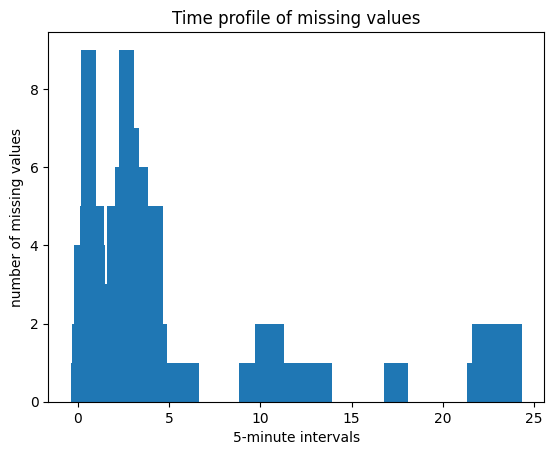

In [6]:
nans_per_time = np.sum(np.isnan(vectorized_day_dataset),0)
print(nans_per_time.shape)

import matplotlib.pyplot as plt

fig, ax = plt.subplots()
# Create an array 'x_axis' representing the 5-minute intervals
x_axis = np.arange(0, nintvals, 1, dtype=int)
# Initialize an empty list 'x_axis_hours' to store time values in hours
x_axis_hours = []
# Convert interval indices to hours and append them to 'x_axis_hours'
for i in range(0, len(x_axis)):
  x_axis_hours.append(float(x_axis[i]*5)/60)
ax.bar(x_axis_hours,height=nans_per_time)


ax.set_ylabel('number of missing values')
ax.set_xlabel('5-minute intervals')
ax.set_title('Time profile of missing values')

plt.show()

In [7]:
nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
print('number of days with missing value',np.size(np.where(nans_per_day > 0),1))

number of days with missing value 28


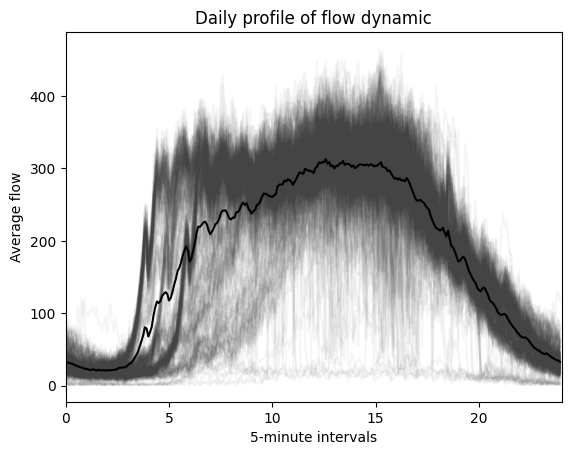

In [8]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()# a convenient way to create a new figure and a set of subplots.
ax.plot(np.array([x_axis_hours,]*ndays).transpose(),vectorized_day_dataset.transpose(),color='#444444',alpha=0.05)
# Above line plots the dataset with specified color and transparency.
ax.plot(x_axis_hours,np.transpose(np.nanmean(vectorized_day_dataset,0)),color='black')
# Above line plots the average of the dataset in black color.

ax.set_ylabel('Average flow')
ax.set_xlabel('5-minute intervals')
plt.xlim(0,24)
ax.set_title('Daily profile of flow dynamic')

plt.show()

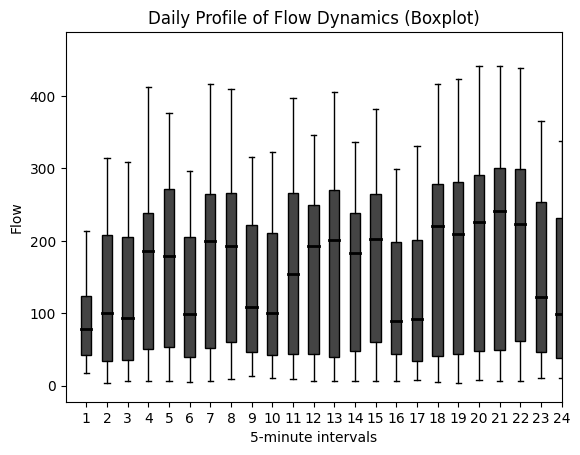

In [9]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()  # This line is a convenient way to create a new figure and a set of subplots.

# Create a boxplot for the dataset
boxplot = ax.boxplot(vectorized_day_dataset.T, patch_artist=True)

# Customize the boxplot appearance
for patch in boxplot['boxes']:
    patch.set_facecolor('#444444')  # Set the box color to gray
for median in boxplot['medians']:
    median.set(color='black', linewidth=2)  # Set median line color to black

# Set the y-axis label
ax.set_ylabel('Flow')

# Set the x-axis label
ax.set_xlabel('5-minute intervals')

# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics (Boxplot)')

# Display the plot
plt.show()

In [10]:
import datetime

# Create an array 'day_of_week' to store the day of the week for each unique date
day_of_week = np.zeros((ndays))

# Loop through each unique date
for i in range(0, ndays):
    # Parse the current date from a string to a datetime object
    day_dt = datetime.datetime.strptime(str(days[i]), '%Y%m%d')

    # Get the day of the week (1 for Monday, 2 for Tuesday, ..., 7 for Sunday)
    day_of_week[i] = day_dt.isoweekday()

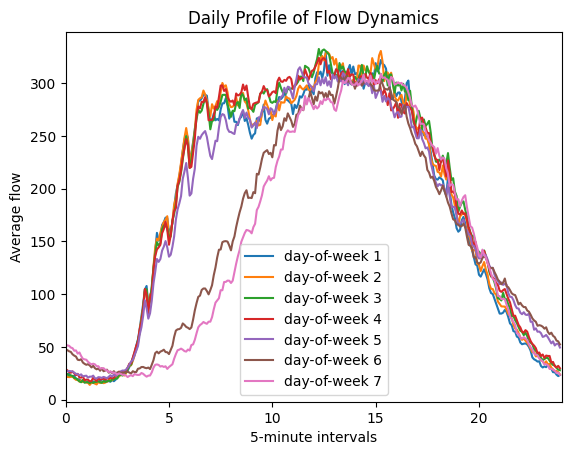

In [11]:
# Create a new figure and axis object using subplots
fig, ax = plt.subplots()

# Iterate through each day of the week (from 1 to 7)
for i in range(1, 8):
    # Find the indices of days that correspond to the current day of the week
    day_of_week_index_t = np.where(day_of_week == i)

    # Calculate the number of days that match the current day of the week
    ndays_t = np.size(day_of_week_index_t[0])

    # Plot the average flow for the current day of the week
    ax.plot(x_axis_hours,
            np.nanmean(vectorized_day_dataset[day_of_week_index_t[0], :].transpose(), 1),
            label='day-of-week ' + str(i))
    # This line plots the average flow for the current day of the week.
    # 'np.nanmean()' calculates the mean while handling NaN values.

# Set the y-axis label
ax.set_ylabel('Average flow')

# Set the x-axis label
ax.set_xlabel('5-minute intervals')

# Set the x-axis limits to be between 0 and 24
plt.xlim(0, 24)

# Set the title of the plot
ax.set_title('Daily Profile of Flow Dynamics')

# Add a legend indicating the day of the week
ax.legend()

# Display the plot
plt.show()

# Clustering

In [12]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.mixture import GaussianMixture

kmeans

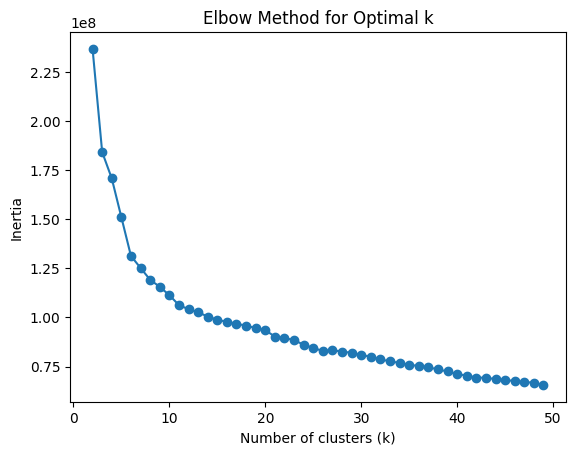

In [ ]:
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

inertia_values = []
k_range = range(2, 50)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans)
    inertia_values.append(kmeans.inertia_)

plt.plot(k_range, inertia_values, 'o-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Using the elbow method, it can be seen that when k is less than 10, the SSE decreases at a high rate, but when k is greater than 10, the SSE decreases at an almost smooth rate, so 10 is the optimum k value.

In [31]:
n_clusters = 10
clusters = None

# Filter out days with NaN values
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]
days_not_nans = days[np.where(nans_per_day == 0)[0]]

# Apply K-Means clustering on the dataset without missing values
clusters = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto").fit(vectorized_day_dataset_no_nans)

# Extract cluster labels if clustering was successful
if clusters is not None:
  cluster_labels = clusters.labels_

# Print the cluster labels
print(cluster_labels)

[4 4 4 9 1 4 9 9 4 4 5 9 9 9 9 4 4 9 9 3 3 3 4 4 9 9 5 9 4 4 9 5 9 9 9 4 4
 9 9 9 5 9 4 4 9 9 3 3 4 4 3 3 3 9 4 4 3 3 9 3 9 4 4 3 9 9 9 3 4 4 3 3 3 3
 3 4 4 3 3 9 3 3 1 3 3 4 4 4 4 9 3 3 3 4 4 3 3 3 3 3 4 4 3 3 3 3 3 4 4 3 3
 3 3 3 4 1 2 2 2 2 2 5 1 2 2 8 5 0 5 1 2 2 5 1 2 2 2 2 2 5 1 2 2 8 2 8 5 1
 2 2 8 8 8 5 1 2 8 2 2 0 5 1 2 2 8 2 5 4 1 8 0 2 8 0 5 7 0 8 0 5 5 0 0 0 0
 0 5 5 0 0 0 0 0 5 5 0 0 5 1 0 0 0 7 1 1 0 0 0 2 0 5 1 2 2 2 2 8 1 1 2 2 2
 2 8 1 1 2 2 2 2 8 5 2 1 1 2 2 8 2 2 1 1 2 2 2 2 1 1 2 2 2 2 2 7 2 2 2 1 1
 2 2 2 2 8 5 1 2 2 2 8 0 1 1 8 2 2 2 1 1 6 6 6 6 4 1 6 6 6 6 1 1 6 6 6 6 6
 1 1 6 6 6 6 6 1 4 6 6 6 6 6 1 4 6 6 6 9 1 1 6 6 6 6 6 1 1 6 6 6 5 4 4 4 5
 1 1 1 4]


## kmeans evaluation

In [32]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels)
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels)
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels)
print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)

Silhouette Score: 0.1888295110481911
Davies-Bouldin Score: 1.7434244441047693
Calinski-Harabasz Score: 81.05449965897482


In [33]:
# Read the evaluation dataset from a CSV file
data_eval_df = pd.read_csv("evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")

# Sort the evaluation DataFrame by columns "Date" and "Interval_5"
data_eval_df.sort_values(["Date", "Interval_5"])

# Extract unique dates from the sorted evaluation DataFrame
days_eval = np.unique(data_eval_df[['Date']].values.ravel())
# Calculate the total number of unique days in the evaluation dataset
ndays_eval = len(days_eval)

# Group the evaluation DataFrame by the "Date" column
day_eval_subsets_df = data_eval_df.groupby(["Date"])

# Initialize a matrix 'vectorized_day_dataset_eval' filled with NaN values
vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
vectorized_day_dataset_eval.fill(np.nan)
# This section initializes a 2D array to store the evaluation dataset and fills it with NaN values.

# Loop through each unique day in the evaluation dataset
for i in range(0, ndays_eval):
    # Get the DataFrame corresponding to the current day
    df_t = day_eval_subsets_df.get_group(days_eval[i])

    # Loop through each row in the current day's DataFrame
    for j in range(len(df_t)):
        # Get the current day's DataFrame (this line is redundant)
        df_t = day_eval_subsets_df.get_group(days_eval[i])

        # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset_eval'
        vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

# Print the resulting 'vectorized_day_dataset_eval'
print(vectorized_day_dataset_eval)

[[35. 29. 32. ... 62. 66. 71.]
 [44. 44. 51. ... 30. 31. 23.]
 [21. 22. 17. ... 20. 22. 22.]
 ...
 [17. 17. 20. ... 35. 25. 27.]
 [37. 25. 30. ... 37. 36. 49.]
 [42. 28. 32. ... 45. 49. 38.]]


In [34]:
# Calculate the total number of NaN values in the evaluation dataset
print('Number of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)))

# Calculate the rate of NaN values in the evaluation dataset
print('Rate of NaNs:', np.sum(np.isnan(vectorized_day_dataset_eval)) / (ndays_eval * nintvals))

# Calculate the number of days with missing values
nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)
print('Number of days with missing values:', np.size(np.where(nans_per_day_eval > 0)))

# Filter out days with no missing values and create a new dataset
vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]

# Calculate the final number of days in the evaluation dataset after removing missing values
print('Final number of days in evaluation dataset:', len(days_not_nans_eval))

# Print the list of days in the evaluation dataset with no missing values
print('List of days without missing values:', days_not_nans_eval)

# Calculate the total number of days in the filtered evaluation dataset
ndays_eval_not_nans = len(days_not_nans_eval)

Number of NaNs: 96
Rate of NaNs: 0.004166666666666667
Number of days with missing values: 11
Final number of days in evaluation dataset: 69
List of days without missing values: [20220108 20220109 20220131 20220204 20220209 20220210 20220211 20220223
 20220226 20220227 20220302 20220304 20220305 20220306 20220310 20220314
 20220315 20220321 20220323 20220326 20220403 20220406 20220416 20220418
 20220421 20220422 20220425 20220427 20220428 20220503 20220505 20220514
 20220519 20220521 20220522 20220526 20220530 20220601 20220603 20220609
 20220616 20220619 20220623 20220628 20220704 20220711 20220712 20220904
 20220910 20220911 20220920 20220921 20220925 20220927 20220929 20220930
 20221005 20221022 20221024 20221114 20221116 20221121 20221122 20221213
 20221216 20221218 20221220 20221223 20221230]


In [36]:
# Import the pairwise_distances function from scikit-learn's metrics library
import sklearn.metrics.pairwise as dis_lib

# Define a function to find the closest centroid to a new data point within a specified day-time interval range
def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None

    # Iterate through each centroid
    for i in range(0, len(centroids)):
        # Calculate the Euclidean distance between the centroid and the new data point
        ed_t = dis_lib.paired_distances(centroids[i], new_day, metric='euclidean')

        # Check if the current centroid is closer than the previously closest one
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    return closest_centroid

# Initialize a list to store centroid data
centroids = []

# Calculate centroids for each cluster
for i in range(0, 10):
    centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
    centroids.append(centroid)

# Define the number of past intervals to consider for classification
n_past_intervals_for_classification = 5

# Initialize variables to calculate accuracy metrics
total_mae = 0
total_mape = 0
prediction_counts = 0

# Loop through each day in the evaluation dataset with no missing values
for i in range(0, ndays_eval_not_nans):
    # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
    for j in range(n_past_intervals_for_classification, nintvals - 1):
        # Find the closest centroid for the current data point
        centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

        # Predict the value for the next interval
        predicted_value = centroids[centroid_index][0, j + 1]

        # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
        mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
        mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

        # Accumulate MAE, MAPE, and count of predictions
        total_mae += mae_t
        total_mape += mape_t
        prediction_counts += 1

# Calculate and print the prediction accuracy metrics
print('Prediction accuracy MAE:', total_mae / prediction_counts)
print('Prediction accuracy MAPE:', total_mape / prediction_counts)

Prediction accuracy MAE: 24.607666013093354
Prediction accuracy MAPE: 0.24531753390066866


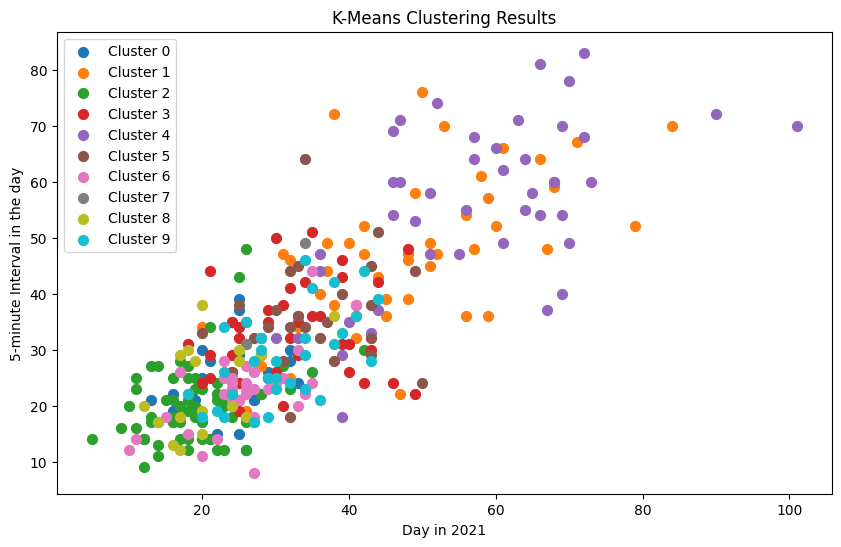

In [38]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np


plt.figure(figsize=(10, 6))

for cluster_id in np.unique(cluster_labels):
    cluster_points = vectorized_day_dataset_no_nans[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=50)

plt.legend()

plt.title("K-Means Clustering Results")
plt.xlabel("Day in 2021")
plt.ylabel("5-minute Interval in the day")
plt.show()

## Agglomerative Clustering

In [64]:
from sklearn.model_selection import GridSearchCV

def custom_bouldin_scorer(estimator, X):
    # Get the cluster labels using the estimator
    cluster_labels = estimator.fit_predict(X)

    # Return the silhouette score as the evaluation metric
    # Silhouette score requires at least 2 clusters
    if len(set(cluster_labels)) > 1:
        return davies_bouldin_score(X, cluster_labels)
    else:
        return -1  # Return -1 if all data points are assigned to one cluster

param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7],
    'metric': ['euclidean', 'manhattan', 'cosine'],
    'linkage': ['complete', 'average', 'single']
}

# Grid search
grid_search = GridSearchCV(
    AgglomerativeClustering(),
    param_grid,
    scoring=custom_bouldin_scorer,
    cv=5
)
grid_search.fit(vectorized_day_dataset_no_nans)

print(f"Best parameters: {grid_search.best_params_}")
print("Best Score:", grid_search.best_score_)

Best parameters: {'linkage': 'complete', 'metric': 'manhattan', 'n_clusters': 7}
Best Score: 1.3914718028227728


In [65]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 7
clusters = None

nans_pre_day = np.isnan(vectorized_day_dataset_no_nans).sum(axis=1)
vectorized_day_dataset_no_nans = vectorized_day_dataset_no_nans[np.where(nans_pre_day == 0)[0], :]
days_not_nans = days_not_nans[np.where(nans_pre_day == 0)[0]]

# Apply AgglomerativeClustering
clusters = AgglomerativeClustering(n_clusters=n_clusters, metric='manhattan', linkage='complete').fit(vectorized_day_dataset_no_nans)

if clusters is not None:
    cluster_labels = clusters.labels_

print(cluster_labels)

[4 2 2 0 0 2 0 0 2 2 0 0 0 0 0 2 2 5 5 5 5 5 2 2 0 5 0 0 2 2 0 0 0 0 0 2 2
 0 0 0 0 0 2 2 5 5 5 5 2 2 5 5 5 0 2 2 5 5 5 5 0 2 2 5 0 5 0 5 2 2 5 5 5 5
 5 2 2 5 5 5 5 5 2 5 5 2 2 2 2 0 5 5 5 2 2 5 5 5 5 5 2 2 5 5 5 5 5 2 2 5 5
 5 5 5 2 2 1 1 1 1 1 0 2 1 1 1 0 0 0 2 1 1 0 2 1 1 1 1 1 0 2 1 1 1 1 1 0 2
 1 1 1 1 1 0 2 1 1 1 1 1 0 2 1 1 1 1 4 4 2 1 1 1 1 1 0 3 6 1 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 3 0 2 1 1 1 1 1 0 2 1 1 1 1 1 0 2 1 1 1
 1 1 0 2 1 1 1 1 1 0 1 0 2 1 1 1 1 1 0 2 1 1 1 1 0 2 1 1 1 1 1 3 1 1 1 0 2
 1 1 1 1 1 0 2 1 1 1 1 1 0 2 1 1 1 1 0 2 5 5 5 5 2 2 5 5 5 5 2 2 5 5 5 5 5
 2 2 5 0 5 5 5 2 2 5 5 5 5 5 2 2 5 5 5 0 2 2 5 5 5 5 5 2 2 5 5 5 0 4 4 2 0
 0 0 0 4]


In [66]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels)
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels)
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels)
print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)

Silhouette Score: 0.21633980234935274
Davies-Bouldin Score: 1.2854299915884386
Calinski-Harabasz Score: 81.4592508896327


In [67]:
# Define a function to find the closest centroid to a new data point within a specified day-time interval range
def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None

    # Iterate through each centroid
    for i in range(0, len(centroids)):
        # Calculate the Euclidean distance between the centroid and the new data point
        ed_t = dis_lib.paired_distances(centroids[i], new_day, metric='euclidean')

        # Check if the current centroid is closer than the previously closest one
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    return closest_centroid

def evaluation(cluster_labels, n_clusters_t):
    # Read the evaluation dataset from a CSV file
    data_eval_df = pd.read_csv("evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")

    # Sort the evaluation DataFrame by columns "Date" and "Interval_5"
    data_eval_df.sort_values(["Date", "Interval_5"])

    # Extract unique dates from the sorted evaluation DataFrame
    days_eval = np.unique(data_eval_df[['Date']].values.ravel())
    # Calculate the total number of unique days in the evaluation dataset
    ndays_eval = len(days_eval)

    # Group the evaluation DataFrame by the "Date" column
    day_eval_subsets_df = data_eval_df.groupby(["Date"])

    # Initialize a matrix 'vectorized_day_dataset_eval' filled with NaN values
    vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
    vectorized_day_dataset_eval.fill(np.nan)
    # This section initializes a 2D array to store the evaluation dataset and fills it with NaN values.

    # Loop through each unique day in the evaluation dataset
    for i in range(0, ndays_eval):
        # Get the DataFrame corresponding to the current day
        df_t = day_eval_subsets_df.get_group(days_eval[i])

        # Loop through each row in the current day's DataFrame
        for j in range(len(df_t)):
            # Get the current day's DataFrame (this line is redundant)
            df_t = day_eval_subsets_df.get_group(days_eval[i])

            # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset_eval'
            vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

    # Calculate the number of days with missing values
    nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)

    # Filter out days with no missing values and create a new dataset
    vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
    days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]

    # Calculate the total number of days in the filtered evaluation dataset
    ndays_eval_not_nans = len(days_not_nans_eval)

    # Initialize a list to store centroid data
    centroids = []

    # Calculate centroids for each cluster
    for i in range(0, n_clusters_t):
        centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
        centroids.append(centroid)

    # Define the number of past intervals to consider for classification
    n_past_intervals_for_classification = 5

    # Initialize variables to calculate accuracy metrics
    total_mae = 0
    total_mape = 0
    prediction_counts = 0

    # Loop through each day in the evaluation dataset with no missing values
    for i in range(0, ndays_eval_not_nans):
        # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
        for j in range(n_past_intervals_for_classification, nintvals - 1):
            # Find the closest centroid for the current data point
            centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

            # Predict the value for the next interval
            predicted_value = centroids[centroid_index][0, j + 1]

            # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
            mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
            mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

            # Accumulate MAE, MAPE, and count of predictions
            total_mae += mae_t
            total_mape += mape_t
            prediction_counts += 1

    # Calculate and print the prediction accuracy metrics
    print('Prediction accuracy MAE:', total_mae / prediction_counts)
    print('Prediction accuracy MAPE:', total_mape / prediction_counts)

In [68]:
evaluation(cluster_labels, n_clusters)

Prediction accuracy MAE: 27.005256483119897
Prediction accuracy MAPE: 0.263619883159103


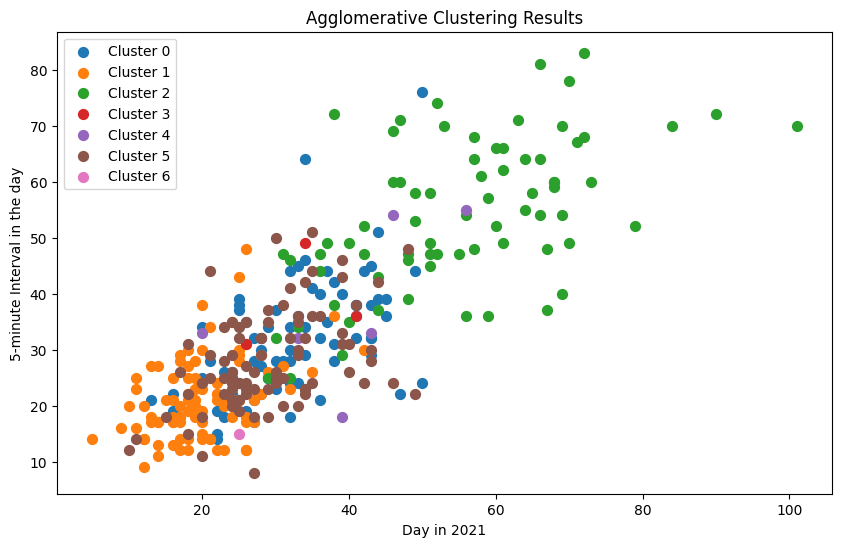

In [69]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

for cluster_id in np.unique(cluster_labels):
    cluster_points = vectorized_day_dataset_no_nans[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=50)

plt.legend()

plt.title("Agglomerative Clustering Results")
plt.xlabel("Day in 2021")
plt.ylabel("5-minute Interval in the day")
plt.show()

DBSCAN

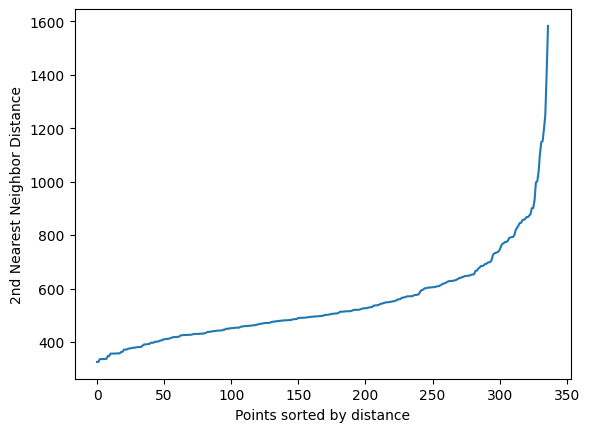

In [ ]:
import numpy as np

nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]

from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(vectorized_day_dataset_no_nans)
distances, indices = nbrs.kneighbors(vectorized_day_dataset_no_nans)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.xlabel('Points sorted by distance')
plt.ylabel('2nd Nearest Neighbor Distance')
plt.show()


In [53]:
import numpy as np

nans_per_day = np.sum(np.isnan(vectorized_day_dataset),1)
vectorized_day_dataset_no_nans = vectorized_day_dataset[np.where(nans_per_day == 0)[0],:]


n_clusters = 10
clusters = None

nans_pre_day = np.isnan(vectorized_day_dataset_no_nans).sum(axis=1)
vectorized_day_dataset_no_nans = vectorized_day_dataset_no_nans[np.where(nans_pre_day == 0)[0], :]
days_not_nans = days_not_nans[np.where(nans_pre_day == 0)[0]]

# Applying DBSCAN
clusters = DBSCAN(eps=500, min_samples=3).fit(vectorized_day_dataset_no_nans)

if clusters is not None:
    cluster_labels = clusters.labels_


print(cluster_labels)

[-1  0  0 -1  1  0  1  1  0  0 -1 -1 -1 -1 -1  0  0  1 -1  1  1  1  0  0
 -1 -1 -1  1  0  0 -1 -1 -1 -1 -1  0  0  1  1  1 -1  1  0  0  1  1  1 -1
  0  0  1 -1 -1 -1  0  0  1  1 -1  1 -1  0  0  1 -1  1 -1  1  0  0  1  1
  1 -1  1  0  0  1 -1 -1 -1  1  0 -1 -1 -1  0  0  0 -1  1  1 -1  0  0 -1
  1  1 -1  1  0  0  1 -1  1  1 -1  0  0 -1  1 -1 -1 -1  0  2  3  3  3 -1
 -1  2  2 -1 -1 -1 -1  4  2  2 -1 -1  2  2 -1  3  3  3 -1  2  2 -1 -1 -1
  3 -1 -1  2  3  3 -1 -1 -1 -1  2 -1 -1  3  3 -1  2  2  3 -1 -1  3 -1 -1
  2 -1 -1 -1 -1 -1  2 -1 -1 -1  4  2  2  4  4 -1  4  4  2  2  4 -1  4  4
  4  2  2  4 -1  2  2  4 -1  4 -1  2  2 -1 -1 -1  4 -1 -1  2  3 -1 -1 -1
 -1  2 -1 -1  3 -1 -1 -1 -1  2  3  3  3 -1 -1 -1  3  2  2  3  3 -1  3 -1
  2  2  3  3 -1 -1 -1  2 -1 -1  3 -1 -1 -1 -1 -1  3 -1 -1 -1 -1  3  3 -1
 -1 -1 -1  3  3 -1 -1  2 -1 -1 -1  3  3  2 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1  0 -1 -1 -1 -1 -1 -1  0  0 -1 -1 -1 -1 -1  0 -1  5 -1 -1 -1 -1  0 -1
 -1 -1 -1 -1  0  0  5  5 -1 -1 -1  0  0 -1 -1 -1 -1

## dbscan evaluation

In [54]:
from sklearn.metrics import calinski_harabasz_score, silhouette_score, davies_bouldin_score

SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels)
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels)
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels)
print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)

Silhouette Score: -0.02772100330028316
Davies-Bouldin Score: 2.3795720914163345
Calinski-Harabasz Score: 35.327906331751436


In [57]:
# Define a function to find the closest centroid to a new data point within a specified day-time interval range
def find_the_closest_centroid(centroids, new_day, from_interval: int, to_interval: int):
    closest_centroid = None
    closest_dist = None

    # Iterate through each centroid
    for i in range(0, len(centroids)):
        # Calculate the Euclidean distance between the centroid and the new data point
        ed_t = dis_lib.paired_distances(centroids[i], new_day, metric='euclidean')

        # Check if the current centroid is closer than the previously closest one
        if closest_centroid is None or closest_dist > ed_t:
            closest_centroid = i
            closest_dist = ed_t

    return closest_centroid

def evaluation(cluster_labels, n_clusters_t):
    # Read the evaluation dataset from a CSV file
    data_eval_df = pd.read_csv("evaluation_dataset_exercise_5_clustering_highway_traffic.csv", sep=";")

    # Sort the evaluation DataFrame by columns "Date" and "Interval_5"
    data_eval_df.sort_values(["Date", "Interval_5"])

    # Extract unique dates from the sorted evaluation DataFrame
    days_eval = np.unique(data_eval_df[['Date']].values.ravel())
    # Calculate the total number of unique days in the evaluation dataset
    ndays_eval = len(days_eval)

    # Group the evaluation DataFrame by the "Date" column
    day_eval_subsets_df = data_eval_df.groupby(["Date"])

    # Initialize a matrix 'vectorized_day_dataset_eval' filled with NaN values
    vectorized_day_dataset_eval = np.zeros((ndays_eval, nintvals))
    vectorized_day_dataset_eval.fill(np.nan)
    # This section initializes a 2D array to store the evaluation dataset and fills it with NaN values.

    # Loop through each unique day in the evaluation dataset
    for i in range(0, ndays_eval):
        # Get the DataFrame corresponding to the current day
        df_t = day_eval_subsets_df.get_group(days_eval[i])

        # Loop through each row in the current day's DataFrame
        for j in range(len(df_t)):
            # Get the current day's DataFrame (this line is redundant)
            df_t = day_eval_subsets_df.get_group(days_eval[i])

            # Extract the "Interval_5" and "flow" values and populate 'vectorized_day_dataset_eval'
            vectorized_day_dataset_eval[i, df_t.iloc[j]["Interval_5"]] = df_t.iloc[j]["flow"]

    # Calculate the number of days with missing values
    nans_per_day_eval = np.sum(np.isnan(vectorized_day_dataset_eval), 1)

    # Filter out days with no missing values and create a new dataset
    vectorized_day_dataset_no_nans_eval = vectorized_day_dataset_eval[np.where(nans_per_day_eval == 0)[0], :]
    days_not_nans_eval = days_eval[np.where(nans_per_day_eval == 0)[0]]

    # Calculate the total number of days in the filtered evaluation dataset
    ndays_eval_not_nans = len(days_not_nans_eval)

    # Initialize a list to store centroid data
    centroids = []

    # Calculate centroids for each cluster
    for i in range(0, n_clusters_t):
        centroid = np.nanmean(vectorized_day_dataset_no_nans[np.where(cluster_labels == i)[0], :], 0).reshape(1, nintvals)
        centroids.append(centroid)

    # Define the number of past intervals to consider for classification
    n_past_intervals_for_classification = 5

    # Initialize variables to calculate accuracy metrics
    total_mae = 0
    total_mape = 0
    prediction_counts = 0

    # Loop through each day in the evaluation dataset with no missing values
    for i in range(0, ndays_eval_not_nans):
        # Loop through intervals from n_past_intervals_for_classification to nintvals - 1
        for j in range(n_past_intervals_for_classification, nintvals - 1):
            # Find the closest centroid for the current data point
            centroid_index = find_the_closest_centroid(centroids, vectorized_day_dataset_no_nans_eval[i].reshape(1, nintvals), j - n_past_intervals_for_classification, j)

            # Predict the value for the next interval
            predicted_value = centroids[centroid_index][0, j + 1]

            # Calculate Mean Absolute Error (MAE) and Mean Absolute Percentage Error (MAPE)
            mae_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1])
            mape_t = abs(predicted_value - vectorized_day_dataset_no_nans_eval[i][j + 1]) / float(vectorized_day_dataset_no_nans_eval[i][j + 1])

            # Accumulate MAE, MAPE, and count of predictions
            total_mae += mae_t
            total_mape += mape_t
            prediction_counts += 1

    # Calculate and print the prediction accuracy metrics
    print('Prediction accuracy MAE:', total_mae / prediction_counts)
    print('Prediction accuracy MAPE:', total_mape / prediction_counts)

In [59]:
dbscan = DBSCAN(eps=500, min_samples=3)
cluster_labels_db = dbscan.fit_predict(vectorized_day_dataset_no_nans)
n_clusters_db = len(np.unique(cluster_labels_db)) - 1  # minus noise cluster

evaluation(cluster_labels_db, n_clusters_db)

Prediction accuracy MAE: 26.27921043835103
Prediction accuracy MAPE: 0.3578926968164425
Prediction accuracy MAE: 26.27921043835103
Prediction accuracy MAPE: 0.3578926968164425


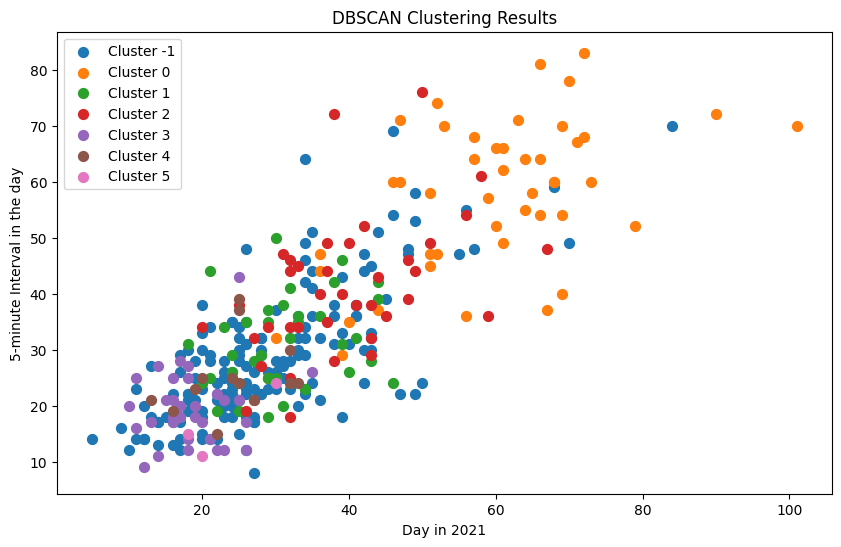

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

for cluster_id in np.unique(cluster_labels):
    cluster_points = vectorized_day_dataset_no_nans[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=50)

plt.legend()

plt.title("DBSCAN Clustering Results")
plt.xlabel("Day in 2021")
plt.ylabel("5-minute Interval in the day")
plt.show()

GMM

In [25]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Remove days that contain missing values
nans_pre_day = np.isnan(vectorized_day_dataset_no_nans).sum(axis=1)
vectorized_day_dataset_no_nans = vectorized_day_dataset_no_nans[np.where(nans_pre_day == 0)[0], :]
days_not_nans = days_not_nans[np.where(nans_pre_day == 0)[0]]

# Define the number of components (equivalent to the number of clusters)
n_components = 10  # You can adjust this value based on your data

# Apply GMM for clustering
gmm = GaussianMixture(n_components=n_components, random_state=42).fit(vectorized_day_dataset_no_nans)

# Predict the cluster for each data point
cluster_labels = gmm.predict(vectorized_day_dataset_no_nans)

# Print the cluster labels
print(cluster_labels)

[1 1 1 8 6 1 8 8 1 1 0 8 8 8 8 1 1 8 4 4 4 4 1 1 8 8 8 8 1 1 8 0 8 8 8 1 1
 8 8 8 8 4 1 1 8 4 4 4 1 1 4 4 4 4 1 1 4 4 8 4 8 1 1 4 8 4 8 4 1 1 4 4 4 4
 4 1 1 4 4 8 4 4 1 4 4 1 1 1 1 8 4 4 4 1 1 4 4 4 4 4 1 1 4 4 4 4 4 1 1 4 4
 4 4 4 1 6 7 7 7 7 7 0 6 7 7 5 0 0 6 6 7 7 0 6 2 7 7 7 7 0 6 7 7 5 7 5 0 6
 7 7 5 5 5 0 6 7 5 7 7 2 0 6 7 7 5 7 0 1 6 5 5 7 5 5 0 3 0 5 7 0 6 0 0 0 0
 0 0 6 0 0 0 0 0 0 6 0 0 6 6 0 0 0 3 6 6 7 7 7 7 5 0 6 7 2 7 7 5 6 6 7 7 7
 5 5 6 6 7 7 7 7 5 0 7 6 6 7 7 5 7 7 6 6 7 7 7 7 6 6 2 7 7 7 7 3 7 7 7 6 6
 7 7 7 7 5 0 6 2 7 7 5 5 6 6 5 7 7 7 6 6 9 9 9 9 1 6 9 9 9 9 6 6 9 9 9 9 9
 6 6 9 9 9 9 9 6 1 9 9 9 9 9 6 1 9 9 9 8 6 1 9 9 9 9 9 6 1 9 9 9 0 1 1 1 0
 6 6 6 1]


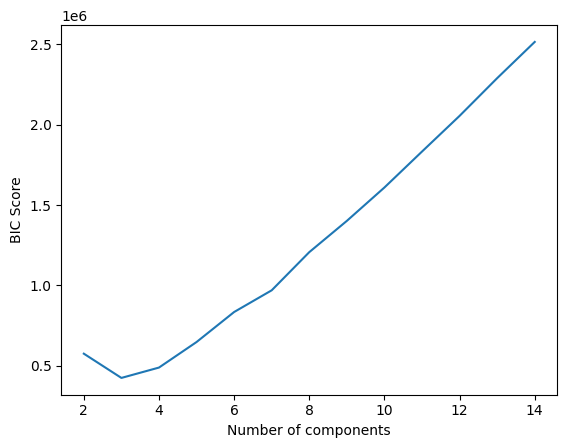

In [26]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
bic_scores = []
for n in range(2, 15):
    gmm = GaussianMixture(n_components=n, random_state=42).fit(vectorized_day_dataset_no_nans)
    bic_scores.append(gmm.bic(vectorized_day_dataset_no_nans))
plt.plot(range(2, 15), bic_scores)
plt.xlabel('Number of components')
plt.ylabel('BIC Score')
plt.show()

evaluation GMM

In [74]:
n_components = 6
gmm = GaussianMixture(n_components=n_components, random_state=42).fit(vectorized_day_dataset_no_nans)

cluster_labels = gmm.predict(vectorized_day_dataset_no_nans)

SC_score = silhouette_score(vectorized_day_dataset_no_nans, cluster_labels)
DB_score = davies_bouldin_score(vectorized_day_dataset_no_nans, cluster_labels)
CH_score = calinski_harabasz_score(vectorized_day_dataset_no_nans, cluster_labels)
print('Silhouette Score:', SC_score)
print('Davies-Bouldin Score:', DB_score)
print('Calinski-Harabasz Score:', CH_score)

evaluation(cluster_labels, n_components)

Silhouette Score: 0.22592742755322823
Davies-Bouldin Score: 1.72024497546609
Calinski-Harabasz Score: 97.02906642456581
Prediction accuracy MAE: 28.35650856329326
Prediction accuracy MAPE: 0.3730574925645639


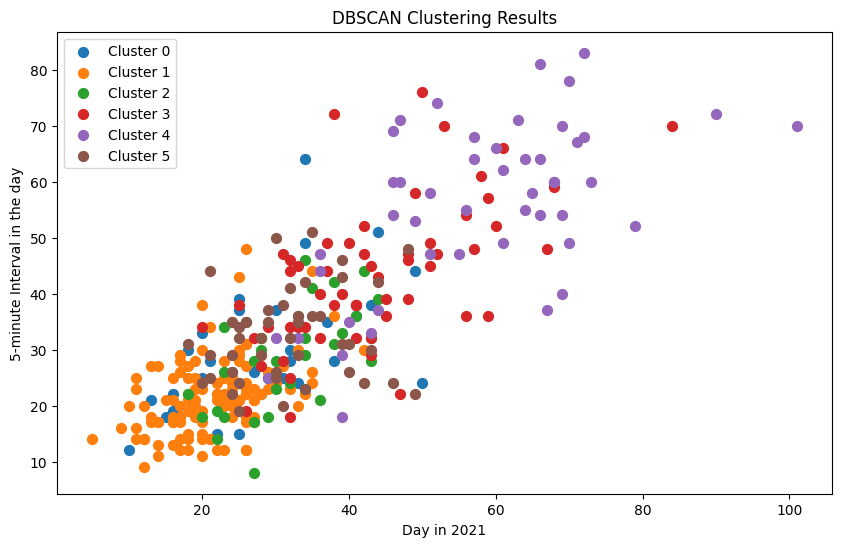

In [75]:
import matplotlib.pyplot as plt
import numpy as np


plt.figure(figsize=(10, 6))

for cluster_id in np.unique(cluster_labels):
    cluster_points = vectorized_day_dataset_no_nans[cluster_labels == cluster_id]
    plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {cluster_id}', s=50)

plt.legend()

plt.title("DBSCAN Clustering Results")
plt.xlabel("Day in 2021")
plt.ylabel("5-minute Interval in the day")
plt.show()